In [1]:
import sys
import os

PACKAGE_PARENT = '../../'
sys.path.append(PACKAGE_PARENT)
# SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser(__file__))))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

from alphaslime.evaluate.eval_agents import EvaluateGameSA
from alphaslime.agents.other.semiGradSarsa import SemiGradSarsa
from alphaslime.approx.linearq import LinearQApprox

from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

import gym
import csv

# Train agent

In [2]:
# config properties
seed = 42
np.random.seed(seed)    

alpha = 0.9 # step size
epsilon = 1
gamma = 0.95
training_episodes = 1000
observation_dimension=4
action_table = [0, 1]

env_id = 'CartPole-v1'
env = gym.make(env_id)
env.seed(seed)

# q function approximator
q_hat = LinearQApprox()

# set config file
config = {
    'alpha': 0.95,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    'd': observation_dimension,
    't_max': 3000,
    'max_score': 200,
    'episode_printer': 100,
    'env': env,
    'weights':None,
    'q_hat': q_hat
}

In [3]:
# configure agent to be trained
agent = SemiGradSarsa(config)

# train agent
agent.train_agent(training_episodes)

# load trained weights
weights = agent.w

# update config weights
config['weights'] = weights

Completed Episodes = 0
Completed Episodes = 100
Completed Episodes = 200


In [4]:
# save weights to disk
# print(sys.path)
# with open('./other/cartpole/train/sarsa/weight.csv', 'w', encoding='UTF8', newline='') as f:
with open('./train/sarsa/weight.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    # writer.writerow(header)

    # write multiple rows
    writer.writerows(weights)

# Evaluate trained agent


In [5]:
# load weights data from disk

df = read_csv('./train/sarsa/weight.csv', header=None)
weights = df.values

In [6]:
# configure agent 
agent.epsilon = 0 # make greedy actions
agent.w = weights
# configure evaluation test
base_dir = './'
RENDER = False
eval_game = EvaluateGameSA(agent=agent, base_dir_path=base_dir, render=RENDER, env=env)

N = 100
# run N episodes
agent_reward = np.zeros((N,2))

In [7]:
# run test
print('Start running episodes..')
for n in range(N):

    reward = eval_game.evaluate_episode()
    agent_reward[n] = reward

print('Evaluation complete')

print('Average reward per episode = {}'.format(np.mean(agent_reward)))

Start running episodes..
Evaluation complete
Average reward per episode = 9.37


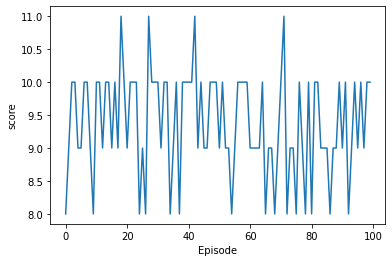

In [8]:
# plot score per episode
episode_indicator = np.array([i for i in range(N)])

plt.plot(episode_indicator, agent_reward[:,0])
plt.xlabel('Episode')
plt.ylabel('score')
plt.show()
